In [1]:
import numpy as np

import matplotlib.pyplot as plt

plt.style.use("bmh")
plt.rcParams["figure.figsize"] = (8, 6)

In [2]:
def marginal_probability(floor, first, last):
    if floor == last:
        return 2 ** -(last - first)

    return 2 ** -(floor - first + 1)


def cumulative_density(floor, first, last):
    return sum([marginal_probability(i, first, last) for i in range(first, floor)])


def plot_pdf_bar(first, last):
    pdfs = [marginal_probability(i, first, last) for i in range(first, last + 1)]

    plt.bar(list(range(first, last + 1)), pdfs)

    plt.xlabel("floor " + r"$n$", fontsize=20)
    plt.ylabel(r"$Pr(X = n)$", fontsize=20)


def compute_entropy(first, last):
    entropy = 0
    for i in range(first, last + 1):
        p = marginal_probability(i, first, last)
        entropy += -p * np.log2(p)

    return entropy


def compute_expected_posterior_entropy(floor, first, last):
    break_probability = cumulative_density(floor, first, last)

    return break_probability * compute_entropy(first, floor - 1) + (
        1 - break_probability
    ) * compute_entropy(floor, last)

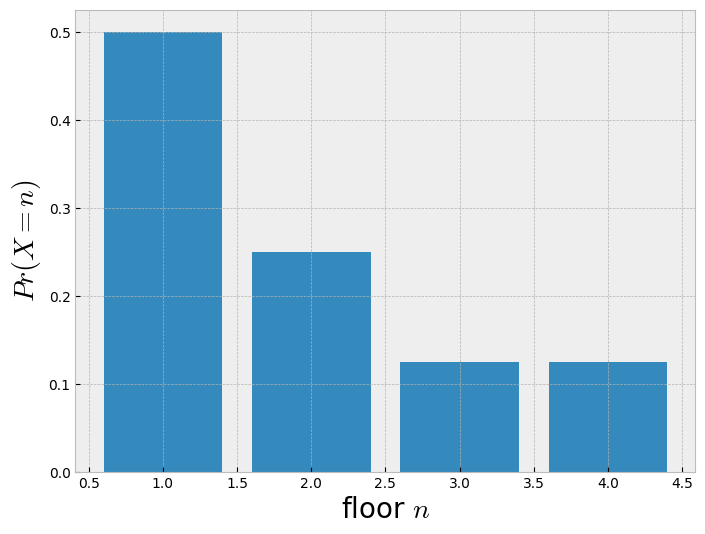

In [3]:
plot_pdf_bar(1, 4)

plt.show()

In [4]:
cumulative_density(2, 1, 10)


0.5

In [5]:
cumulative_density(5, 1, 10)

0.9375

In [6]:
compute_entropy(1, 10)

1.99609375

In [7]:
compute_entropy(1, 4)

1.75

In [8]:
compute_entropy(5, 10)

1.9375

In [9]:
compute_expected_posterior_entropy(5, 1, 10)

1.76171875

In [10]:
compute_expected_posterior_entropy(2, 1, 10)

0.99609375

In [11]:
compute_expected_posterior_entropy(1, 1, 10)

1.99609375

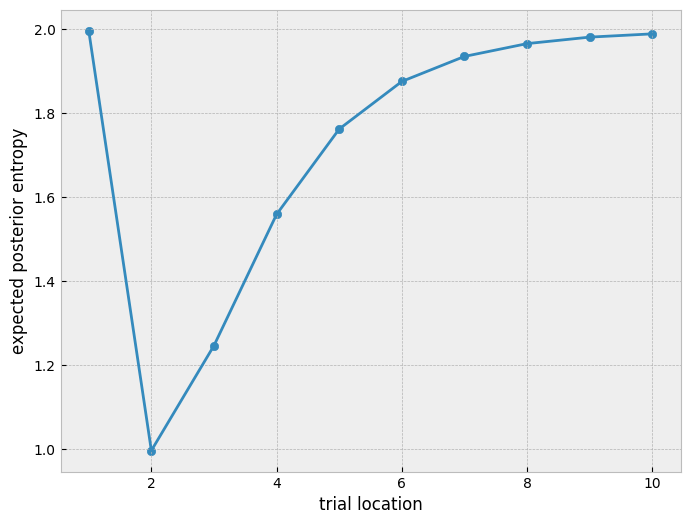

In [12]:
floors = list(range(1, 11))
exp_post_entropies = [compute_expected_posterior_entropy(i, 1, 10) for i in floors]

plt.scatter(floors, exp_post_entropies)
plt.plot(floors, exp_post_entropies)

plt.xlabel("trial location")
plt.ylabel("expected posterior entropy")

plt.show()